C:\Users\ravit\anaconda3\envs\intelproject\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
import torch


In [5]:
import os

os.environ['PYTHONIOENCODING'] = 'utf-8'


In [6]:
import sys
sys.stdin.reconfigure(encoding='utf-8')
sys.stdout.reconfigure(encoding='utf-8')


AttributeError: 'OutStream' object has no attribute 'reconfigure'

In [5]:
torch.cuda.is_available()

True

In [6]:
torch.cuda.get_device_name(0)

'NVIDIA GeForce RTX 3050 Laptop GPU'

In [7]:
torch.cuda.memory_allocated()

0

In [7]:
!pip install super-gradients==3.1.0

  Using cached super_gradients-3.1.0-py3-none-any.whl (965 kB)
  Attempting uninstall: super-gradients
    Found existing installation: super-gradients 3.1.1
    Uninstalling super-gradients-3.1.1:
      Successfully uninstalled super-gradients-3.1.1


In [10]:
!pip install -U --force-reinstall charset-normalizer


  Using cached charset_normalizer-3.1.0-cp39-cp39-win_amd64.whl (97 kB)
  Attempting uninstall: charset-normalizer
    Found existing installation: charset-normalizer 2.0.4
    Uninstalling charset-normalizer-2.0.4:
      Successfully uninstalled charset-normalizer-2.0.4


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
requests 2.28.1 requires charset-normalizer<3,>=2, but you have charset-normalizer 3.1.0 which is incompatible.
tensorflow 2.9.1 requires protobuf<3.20,>=3.9.2, but you have protobuf 3.20.3 which is incompatible.
tensorflow 2.9.1 requires tensorboard<2.10,>=2.9, but you have tensorboard 2.13.0 which is incompatible.
tensorflow-gpu 2.9.0 requires tensorboard<2.10,>=2.9, but you have tensorboard 2.13.0 which is incompatible.


In [1]:
from super_gradients.training import Trainer
from super_gradients.training import dataloaders
from super_gradients.training.dataloaders.dataloaders import coco_detection_yolo_format_train, coco_detection_yolo_format_val

C:\Users\ravit\anaconda3\envs\GPU2\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\ravit\anaconda3\envs\GPU2\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\ravit\anaconda3\envs\GPU2\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
from IPython.display import clear_output
from super_gradients.training.losses import PPYoloELoss
from super_gradients.training.metrics import DetectionMetrics_050
from super_gradients.training.models.detection_models.pp_yolo_e import PPYoloEPostPredictionCallback

In [3]:

from super_gradients.training import models

In [4]:
CHECKPOINT_DIR = 'D://PROJECTS/social distance/code/YOLO-NAS-main/checkpoints/'
trainer = Trainer(experiment_name='ppe_yolonas_run2', ckpt_root_dir=CHECKPOINT_DIR)
     


In [10]:

dataset_params = {
    'data_dir':'D:/PROJECTS/hackathon trial/data/data',
    'train_images_dir':'D:/PROJECTS/hackathon trial/data/data/train/images',
    'train_labels_dir':'D:/PROJECTS/hackathon trial/data/data/train/labels',
    'val_images_dir':'D:/PROJECTS/hackathon trial/data/data/valid/images',
    'val_labels_dir':'D:/PROJECTS/hackathon trial/data/data/valid/labels',
    'test_images_dir':'D:/PROJECTS/hackathon trial/data/data/test/images',
    'test_labels_dir':'D:/PROJECTS/hackathon trial/data/data/test/labels',
    'classes': ['person']
}

In [11]:
train_data = coco_detection_yolo_format_train(
    dataset_params={
        'data_dir': dataset_params['data_dir'],
        'images_dir': dataset_params['train_images_dir'],
        'labels_dir': dataset_params['train_labels_dir'],
        'classes': dataset_params['classes']
    },
    dataloader_params={
        'batch_size':8,
        'num_workers':0
    }
)

val_data = coco_detection_yolo_format_val(
    dataset_params={
        'data_dir': dataset_params['data_dir'],
        'images_dir': dataset_params['val_images_dir'],
        'labels_dir': dataset_params['val_labels_dir'],
        'classes': dataset_params['classes']
    },
    dataloader_params={
        'batch_size':8,
        'num_workers':0
    }
)

test_data = coco_detection_yolo_format_val(
    dataset_params={
        'data_dir': dataset_params['data_dir'],
        'images_dir': dataset_params['test_images_dir'],
        'labels_dir': dataset_params['test_labels_dir'],
        'classes': dataset_params['classes']
    },
    dataloader_params={
        'batch_size':8,
        'num_workers':0
    }
)

clear_output()
     

Caching annotations: 100%|██████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 758.22it/s]


In [13]:
train_data.dataset.transforms

[DetectionMosaic('additional_samples_count': 3, 'non_empty_targets': False, 'prob': 1.0, 'input_dim': [640, 640], 'enable_mosaic': True, 'border_value': 114),
 DetectionRandomAffine('additional_samples_count': 0, 'non_empty_targets': False, 'degrees': 10.0, 'translate': 0.1, 'scale': [0.1, 2], 'shear': 2.0, 'target_size': [640, 640], 'enable': True, 'filter_box_candidates': True, 'wh_thr': 2, 'ar_thr': 20, 'area_thr': 0.1, 'border_value': 114),
 DetectionMixup('additional_samples_count': 1, 'non_empty_targets': True, 'input_dim': [640, 640], 'mixup_scale': [0.5, 1.5], 'prob': 1.0, 'enable_mixup': True, 'flip_prob': 0.5, 'border_value': 114),
 DetectionHSV('additional_samples_count': 0, 'non_empty_targets': False, 'prob': 1.0, 'hgain': 5, 'sgain': 30, 'vgain': 30, 'bgr_channels': (0, 1, 2), '_additional_channels_warned': False),
 DetectionHorizontalFlip('additional_samples_count': 0, 'non_empty_targets': False, 'prob': 0.5, 'max_targets': 120),
 DetectionPaddedRescale('swap': (2, 0, 1),

In [14]:
train_data.dataset.dataset_params['transforms'][1]


{'DetectionRandomAffine': {'degrees': 10.0, 'translate': 0.1, 'scales': [0.1, 2], 'shear': 2.0, 'target_size': [640, 640], 'filter_box_candidates': True, 'wh_thr': 2, 'area_thr': 0.1, 'ar_thr': 20}}

In [15]:
train_data.dataset.dataset_params['transforms'][1]['DetectionRandomAffine']['degrees'] = 10.42

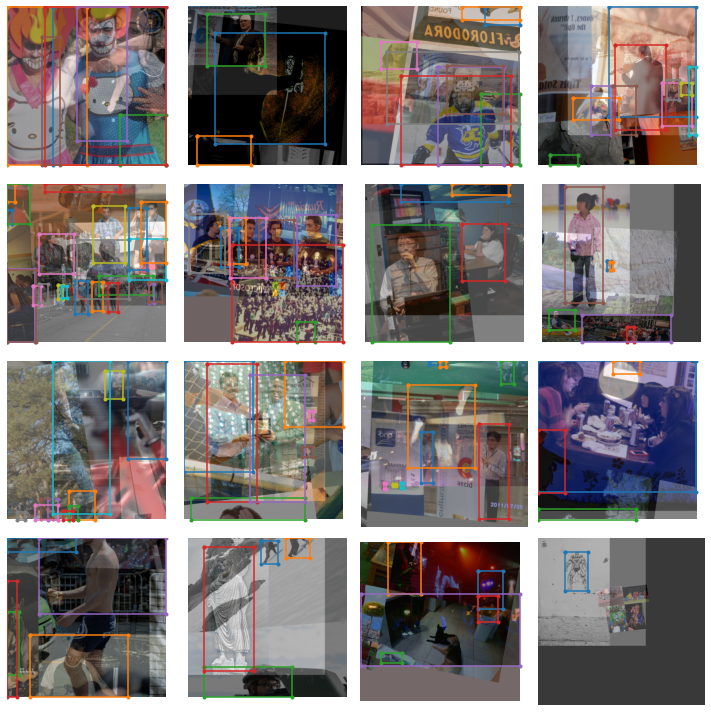

In [16]:
train_data.dataset.plot()

In [17]:
import torch
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [18]:

model = models.get('yolo_nas_m', 
                   num_classes=len(dataset_params['classes']), 
                   pretrained_weights="coco"
                   )
     


In [19]:

train_params = {
    # ENABLING SILENT MODE
    'silent_mode': True,
    "average_best_models":True,
    "warmup_mode": "linear_epoch_step",
    "warmup_initial_lr": 1e-6,
    "lr_warmup_epochs": 3,
    "initial_lr": 5e-4,
    "lr_mode": "cosine",
    "cosine_final_lr_ratio": 0.1,
    "optimizer": "Adam",
    "optimizer_params": {"weight_decay": 0.0001},
    "zero_weight_decay_on_bias_and_bn": True,
    "ema": True,
    "ema_params": {"decay": 0.9, "decay_type": "threshold"},
    # ONLY TRAINING FOR 10 EPOCHS FOR THIS EXAMPLE NOTEBOOK
    "max_epochs": 100,
    "mixed_precision": True,
    "loss": PPYoloELoss(
        use_static_assigner=False,
        # NOTE: num_classes needs to be defined here
        num_classes=len(dataset_params['classes']),
        reg_max=16
    ),
    "valid_metrics_list": [
        DetectionMetrics_050(
            score_thres=0.1,
            top_k_predictions=300,
            # NOTE: num_classes needs to be defined here
            num_cls=len(dataset_params['classes']),
            normalize_targets=True,
            post_prediction_callback=PPYoloEPostPredictionCallback(
                score_threshold=0.01,
                nms_top_k=1000,
                max_predictions=300,
                nms_threshold=0.7
            )
        )
    ],
    "metric_to_watch": 'mAP@0.50'
}


In [20]:
import torch
torch.cuda.is_available()

True

# TRAINING 

In [ ]:

trainer.train(model=model, 
              training_params=train_params, 
              train_loader=train_data, 
              valid_loader=val_data)


In [132]:
avg_model = models.get('yolo_nas_m',
                        num_classes=len(dataset_params['classes']),
                        checkpoint_path="D://PROJECTS/social distance/code/YOLO-NAS-main/checkpoints/ppe_yolonas_run2/ckpt_latest.pth")

In [21]:
best_model = models.get('yolo_nas_m',
                        num_classes=len(dataset_params['classes']),
                        checkpoint_path="D://PROJECTS/PERSON-DETECTION USING YOLO-NAS/code/YOLO-NAS-main/checkpoints/ppe_yolonas_run2/ckpt_best.pth")


In [21]:
trainer.test(model=best_model,
            test_loader=test_data,
            test_metrics_list=DetectionMetrics_050(score_thres=0.1, 
                                                   top_k_predictions=300, 
                                                   num_cls=len(dataset_params['classes']), 
                                                   normalize_targets=True, 
                                                   post_prediction_callback=PPYoloEPostPredictionCallback(score_threshold=0.01, 
                                                                                                          nms_top_k=1000, 
                                                                                                          max_predictions=300,                                                                              
                                                                                                          nms_threshold=0.7)
                                                  ))

Test:  92%|█████████▏| 12/13 [00:16<00:00,  1.30it/s]

{'Precision@0.50': tensor(0.0128),
 'Recall@0.50': tensor(0.8895),
 'mAP@0.50': tensor(0.3034),
 'F1@0.50': tensor(0.0252)}

Test: 100%|██████████| 13/13 [00:17<00:00,  1.32s/it]


# prediction with the best model, image

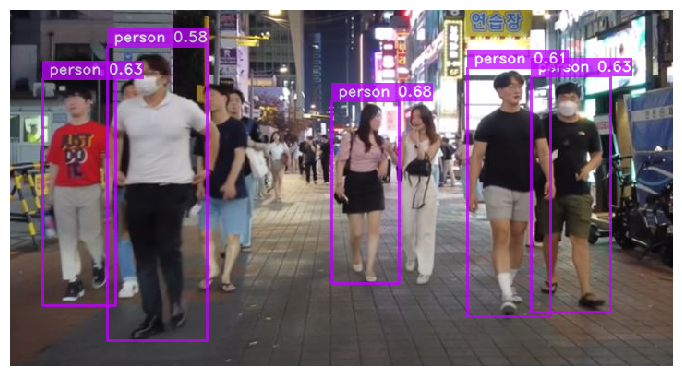

In [23]:
img_url = 'D:/PROJECTS/PERSON-DETECTION USING YOLO-NAS/p1.jpg'
best_model.predict(img_url).show()

# for predicting the person in a video 

In [24]:
import torch
device = 0 if torch.cuda.is_available() else "cpu"

input_video_path = "D:/PROJECTS/PERSON-DETECTION USING YOLO-NAS/pedestrians.mp4"
output_video_path = "D:/PROJECTS/PERSON-DETECTION USING YOLO-NAS/output20.mp4"
#device=0

best_model.to(device).predict(input_video_path).save(output_video_path)

Predicting Video: 100%|██████████████████████████████████████████████████████████████| 531/531 [01:58<00:00,  4.48it/s]
